In [1]:
import sys
sys.path.append('../src/')
import importlib
from matplotlib import pylab as plt
%matplotlib inline 

import numpy as np
import torch
import torchvision

import cifar_data
import resnet18
import module2graph
import utils
importlib.reload(utils)
importlib.reload(module2graph)

<module 'module2graph' from '/home/legin/reps/fast_nas_adapt/notebooks/../src/module2graph.py'>

In [7]:
batch_size = 64
device = 'cpu'
trial_num = 1
epoch_num = 1
lr = 1e-3
batch_seen = 5
prune_percentages = [0.02, 0.05, 0.1, 0.15, 0.2]

In [3]:
trainloader, testloader = cifar_data.get_dataloaders([8,9], batch_size=batch_size)


Files already downloaded and verified
Files already downloaded and verified


In [4]:
def safe_prune(model, percentage, rs):
    for x,y in trainloader:
        break
    while True:
        gammas_to_prune = list(range(len(model.gammas)))
        rs.shuffle(gammas_to_prune)
        gammas_to_prune = gammas_to_prune[:int(len(gammas_to_prune)*(percentage))]
        for g in gammas_to_prune:
            model.gammas[g] = 0.0
        if abs(model(x) - model(torch.zeros(x.shape))).sum() < 1e-5:
            for g in range(len(model.gammas)):
                model.gammas[g] = 1.0
            continue
        break


In [8]:
rs = np.random.RandomState(42)
result = {}
for percentage in prune_percentages:
    model = resnet18.ResNet18(8).to(device)
    model.load_state_dict(torch.load('../data/model_last.ckpt', map_location=device))
    model.model.fc = torch.nn.Linear(512, 2)
    model = module2graph.GraphInterperterWithGamma(model)
    
    result[percentage] = []
    for trial in range(trial_num):
        safe_prune(model, percentage, rs)
        print (f'percentage {percentage} trial {trial}')
        result[percentage].append(utils.train_loop(model, trainloader, testloader, batch_seen, epoch_num, lr, device))

Using cache found in /home/legin/.cache/torch/hub/pytorch_vision_v0.10.0


percentage 0.02 trial 0


  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 5. Accuracy: 0.8009999990463257


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 10. Accuracy: 0.8364999890327454


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 15. Accuracy: 0.8560000061988831


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 20. Accuracy: 0.8815000057220459


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 25. Accuracy: 0.8759999871253967


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 30. Accuracy: 0.8274999856948853


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 35. Accuracy: 0.8585000038146973


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 40. Accuracy: 0.8774999976158142


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 45. Accuracy: 0.7490000128746033


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 50. Accuracy: 0.6549999713897705


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 55. Accuracy: 0.8615000247955322


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 60. Accuracy: 0.890500009059906


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 65. Accuracy: 0.8964999914169312


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 70. Accuracy: 0.8970000147819519


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 75. Accuracy: 0.9035000205039978


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 80. Accuracy: 0.8895000219345093


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 85. Accuracy: 0.906000018119812


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 90. Accuracy: 0.9014999866485596


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 95. Accuracy: 0.8945000171661377


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 100. Accuracy: 0.902999997138977


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 105. Accuracy: 0.9075000286102295


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 110. Accuracy: 0.8930000066757202


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 115. Accuracy: 0.8845000267028809


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 120. Accuracy: 0.8650000095367432


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 125. Accuracy: 0.8514999747276306


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 130. Accuracy: 0.8504999876022339


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 135. Accuracy: 0.8519999980926514


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 140. Accuracy: 0.8529999852180481


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 145. Accuracy: 0.8370000123977661


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 150. Accuracy: 0.8684999942779541


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 155. Accuracy: 0.8349999785423279


Using cache found in /home/legin/.cache/torch/hub/pytorch_vision_v0.10.0


percentage 0.05 trial 0


  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 5. Accuracy: 0.8230000138282776


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 10. Accuracy: 0.8090000152587891


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 15. Accuracy: 0.8504999876022339


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 20. Accuracy: 0.8629999756813049


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 25. Accuracy: 0.8335000276565552


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 30. Accuracy: 0.8880000114440918


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 35. Accuracy: 0.8255000114440918


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 40. Accuracy: 0.8059999942779541


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 45. Accuracy: 0.8220000267028809


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 50. Accuracy: 0.8180000185966492


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 55. Accuracy: 0.8845000267028809


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 60. Accuracy: 0.8955000042915344


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 65. Accuracy: 0.8914999961853027


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 70. Accuracy: 0.8859999775886536


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 75. Accuracy: 0.8859999775886536


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 80. Accuracy: 0.902999997138977


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 85. Accuracy: 0.8974999785423279


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 90. Accuracy: 0.8550000190734863


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 95. Accuracy: 0.8619999885559082


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 100. Accuracy: 0.862500011920929


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 105. Accuracy: 0.8845000267028809


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 110. Accuracy: 0.9079999923706055


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 115. Accuracy: 0.9004999995231628


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 120. Accuracy: 0.9045000076293945


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 125. Accuracy: 0.9010000228881836


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 130. Accuracy: 0.9075000286102295


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 135. Accuracy: 0.9004999995231628


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 140. Accuracy: 0.8970000147819519


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 145. Accuracy: 0.8999999761581421


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 150. Accuracy: 0.9035000205039978


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 155. Accuracy: 0.8930000066757202


Using cache found in /home/legin/.cache/torch/hub/pytorch_vision_v0.10.0


percentage 0.1 trial 0


  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 5. Accuracy: 0.7490000128746033


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 10. Accuracy: 0.7434999942779541


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 15. Accuracy: 0.7574999928474426


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 20. Accuracy: 0.7634999752044678


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 25. Accuracy: 0.6970000267028809


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 30. Accuracy: 0.6729999780654907


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 35. Accuracy: 0.6635000109672546


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 40. Accuracy: 0.6474999785423279


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 45. Accuracy: 0.6455000042915344


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 50. Accuracy: 0.6744999885559082


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 55. Accuracy: 0.6995000243186951


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 60. Accuracy: 0.7394999861717224


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 65. Accuracy: 0.6504999995231628


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 70. Accuracy: 0.6200000047683716


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 75. Accuracy: 0.6919999718666077


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 80. Accuracy: 0.7204999923706055


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 85. Accuracy: 0.7444999814033508


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 90. Accuracy: 0.7179999947547913


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 95. Accuracy: 0.6549999713897705


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 100. Accuracy: 0.5764999985694885


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 105. Accuracy: 0.593999981880188


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 110. Accuracy: 0.6240000128746033


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 115. Accuracy: 0.6284999847412109


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 120. Accuracy: 0.6430000066757202


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 125. Accuracy: 0.628000020980835


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 130. Accuracy: 0.5995000004768372


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 135. Accuracy: 0.6000000238418579


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 140. Accuracy: 0.6274999976158142


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 145. Accuracy: 0.6420000195503235


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 150. Accuracy: 0.6700000166893005


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 155. Accuracy: 0.6549999713897705


Using cache found in /home/legin/.cache/torch/hub/pytorch_vision_v0.10.0


percentage 0.15 trial 0


  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 5. Accuracy: 0.5699999928474426


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 10. Accuracy: 0.6039999723434448


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 15. Accuracy: 0.6345000267028809


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 20. Accuracy: 0.6445000171661377


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 25. Accuracy: 0.640500009059906


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 30. Accuracy: 0.6604999899864197


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 35. Accuracy: 0.6669999957084656


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 40. Accuracy: 0.6664999723434448


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 45. Accuracy: 0.6355000138282776


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 50. Accuracy: 0.625


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 55. Accuracy: 0.6420000195503235


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 60. Accuracy: 0.6894999742507935


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 65. Accuracy: 0.6735000014305115


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 70. Accuracy: 0.6990000009536743


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 75. Accuracy: 0.6959999799728394


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 80. Accuracy: 0.6819999814033508


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 85. Accuracy: 0.6859999895095825


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 90. Accuracy: 0.6585000157356262


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 95. Accuracy: 0.5005000233650208


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 100. Accuracy: 0.515500009059906


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 105. Accuracy: 0.546999990940094


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 110. Accuracy: 0.6129999756813049


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 115. Accuracy: 0.6274999976158142


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 120. Accuracy: 0.6290000081062317


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 125. Accuracy: 0.6234999895095825


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 130. Accuracy: 0.6480000019073486


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 135. Accuracy: 0.6959999799728394


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 140. Accuracy: 0.6604999899864197


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 145. Accuracy: 0.6579999923706055


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 150. Accuracy: 0.6690000295639038


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 155. Accuracy: 0.6740000247955322


Using cache found in /home/legin/.cache/torch/hub/pytorch_vision_v0.10.0


percentage 0.2 trial 0


  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 5. Accuracy: 0.574999988079071


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 10. Accuracy: 0.7020000219345093


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 15. Accuracy: 0.7114999890327454


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 20. Accuracy: 0.7014999985694885


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 25. Accuracy: 0.6349999904632568


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 30. Accuracy: 0.609499990940094


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 35. Accuracy: 0.6065000295639038


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 40. Accuracy: 0.6309999823570251


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 45. Accuracy: 0.637499988079071


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 50. Accuracy: 0.6399999856948853


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 55. Accuracy: 0.6504999995231628


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 60. Accuracy: 0.6474999785423279


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 65. Accuracy: 0.6305000185966492


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 70. Accuracy: 0.6290000081062317


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 75. Accuracy: 0.6434999704360962


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 80. Accuracy: 0.6620000004768372


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 85. Accuracy: 0.671500027179718


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 90. Accuracy: 0.7045000195503235


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 95. Accuracy: 0.6685000061988831


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 100. Accuracy: 0.6600000262260437


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 105. Accuracy: 0.6884999871253967


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 110. Accuracy: 0.6520000100135803


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 115. Accuracy: 0.6355000138282776


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 120. Accuracy: 0.6610000133514404


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 125. Accuracy: 0.6399999856948853


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 130. Accuracy: 0.6384999752044678


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 135. Accuracy: 0.6259999871253967


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 140. Accuracy: 0.6255000233650208


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 145. Accuracy: 0.6614999771118164


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 150. Accuracy: 0.6919999718666077


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0. Batch seen: 155. Accuracy: 0.7020000219345093


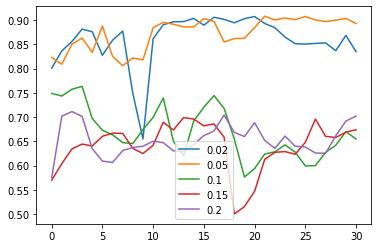

In [11]:
for k in result:
    plt.plot(np.mean(result[k], 0), label=str(k))
    plt.legend(loc='best')